## Logistic Regression with Scikit Learn - Machine Learning with Python


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
df=pd.read_csv("C:\\Users\\patha\\OneDrive\\Desktop\\pythonlib\\weatherAUS.csv")
df 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.columns.to_list


<bound method IndexOpsMixin.tolist of Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')>

In [4]:
df.duplicated().any()
# there is no dublicate row in my dataframe 

np.False_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
num_columns=df.select_dtypes(include='number').columns.tolist()
num_df=df[num_columns]
num_df



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [8]:
df["RainTomorrow"].isnull().sum()
df.dropna(subset=['RainTomorrow','RainToday'],inplace=True)
df.shape

(140787, 23)

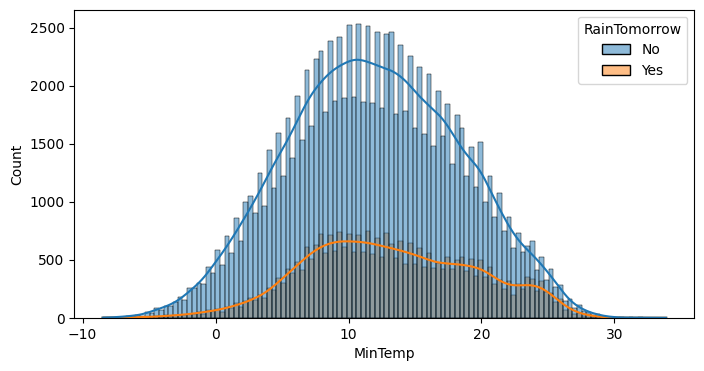

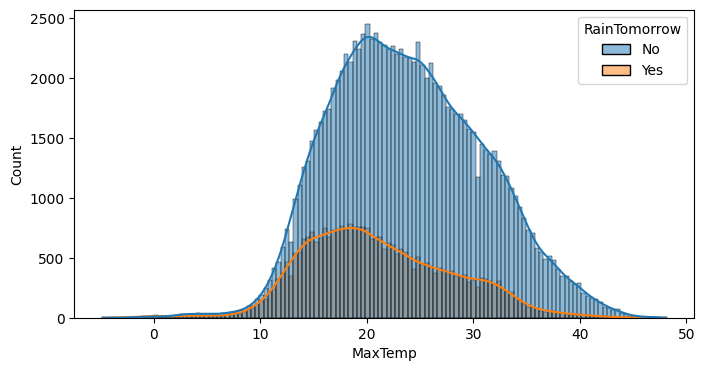

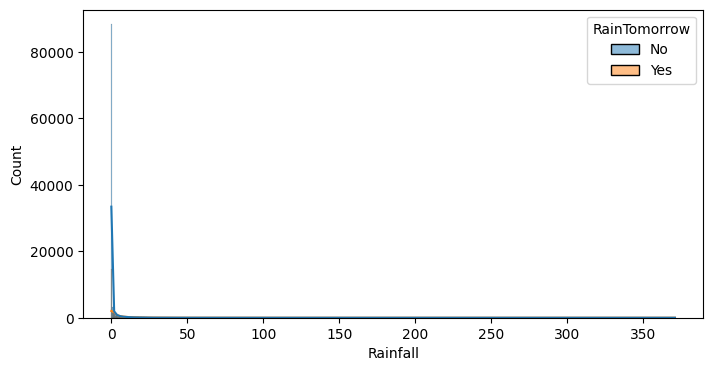

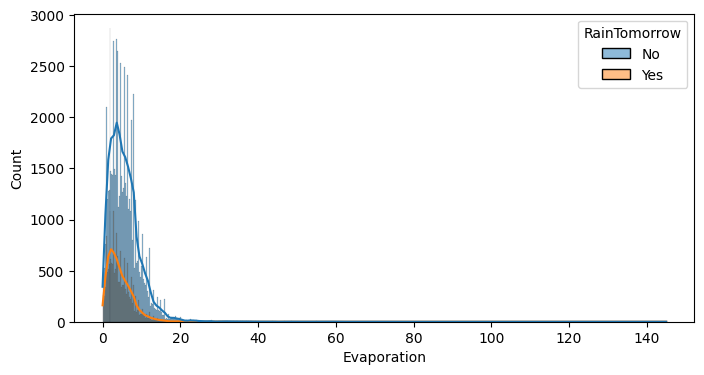

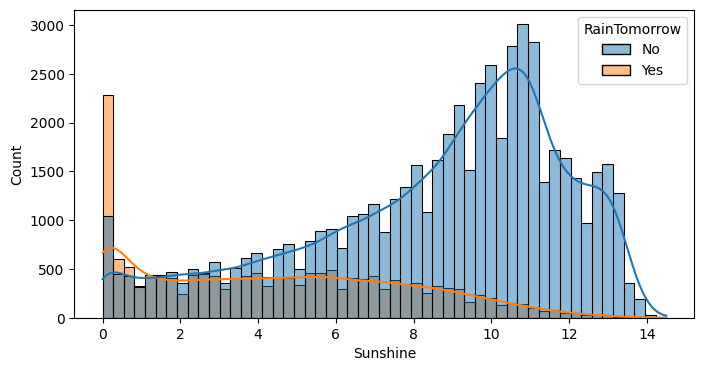

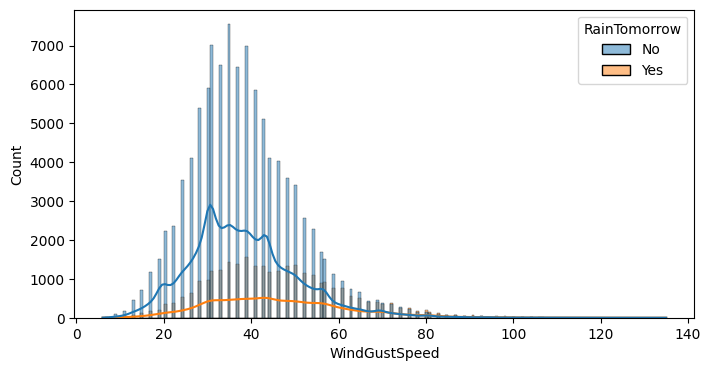

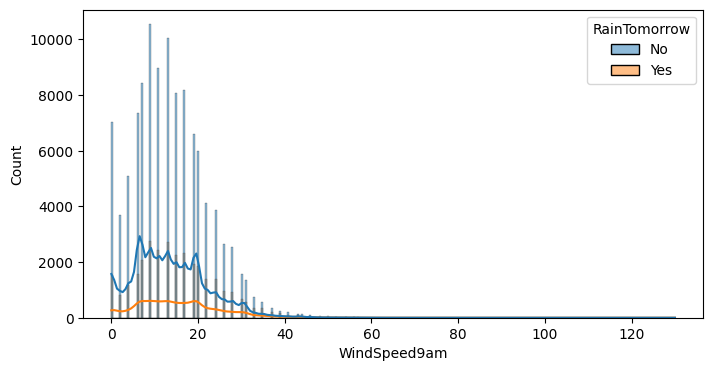

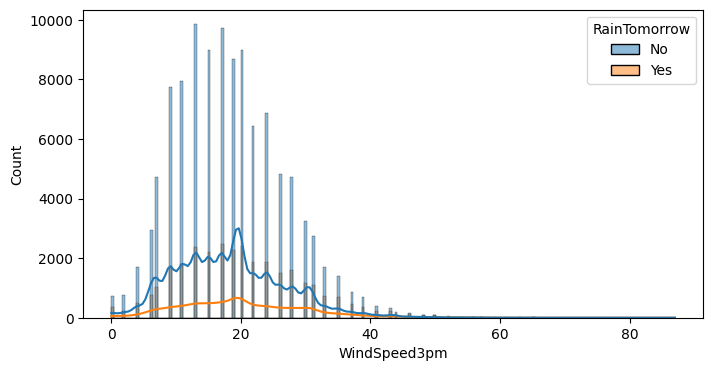

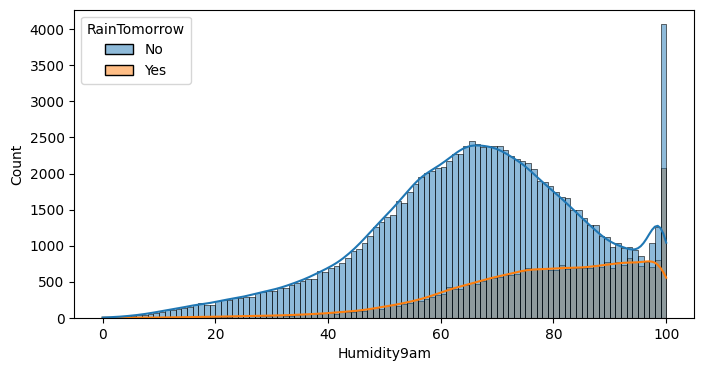

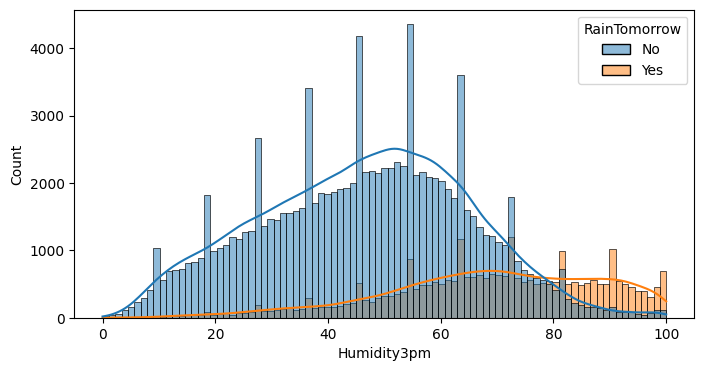

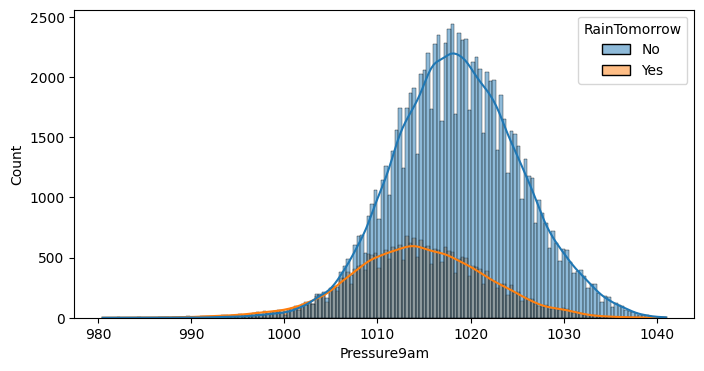

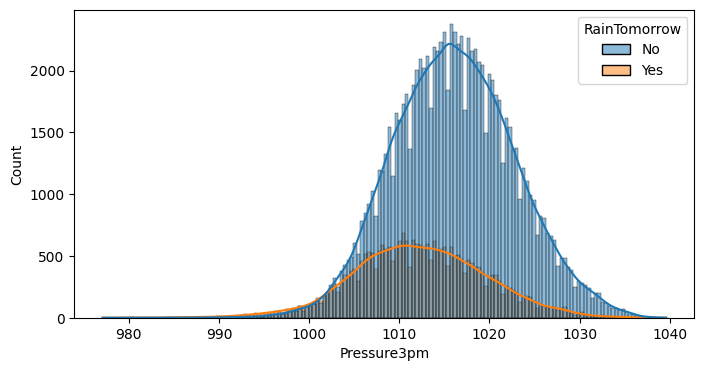

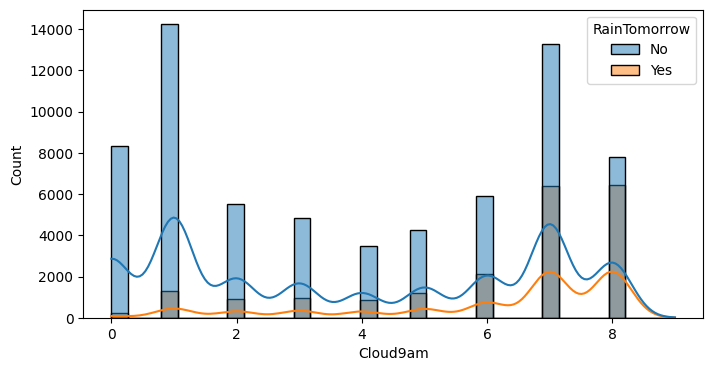

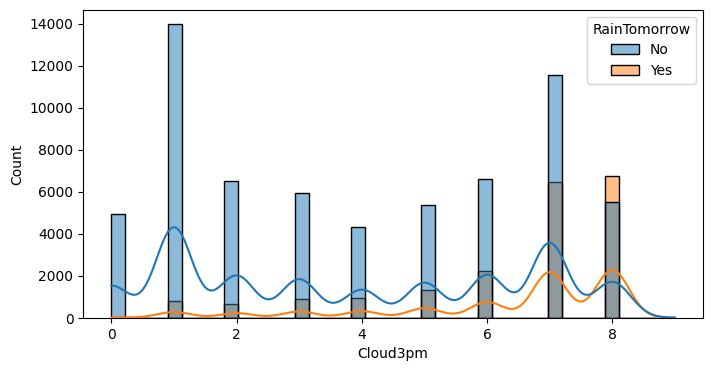

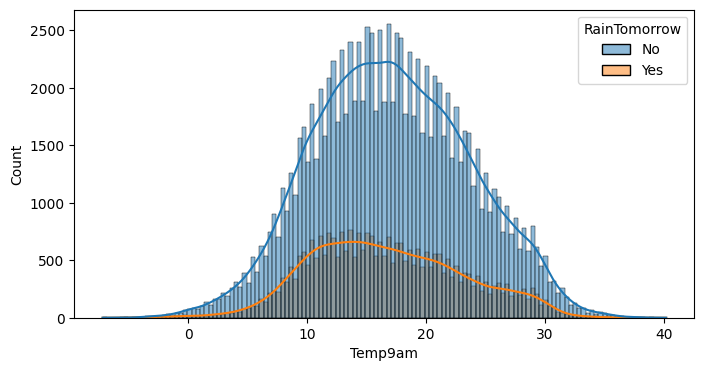

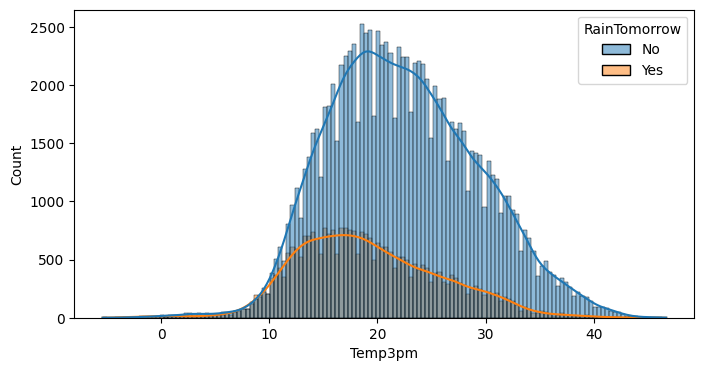

In [9]:
for col in num_df:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,x=col,kde=True,hue='RainTomorrow')
    plt.show()

if there is same distribution for both the  target categories of hue that the specific feature  is not anlone is strong predictor like 
taking example of tempurature at 3 pm the hue for yes and no shows the same distribution so we can say at temp is between 15 and 25 there is high chance it may rain also and it maynot rain we cannot say there is a high chance it may or may not rain if the tempurature is  between 15 and 25

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='Cloud9am', ylabel='count'>

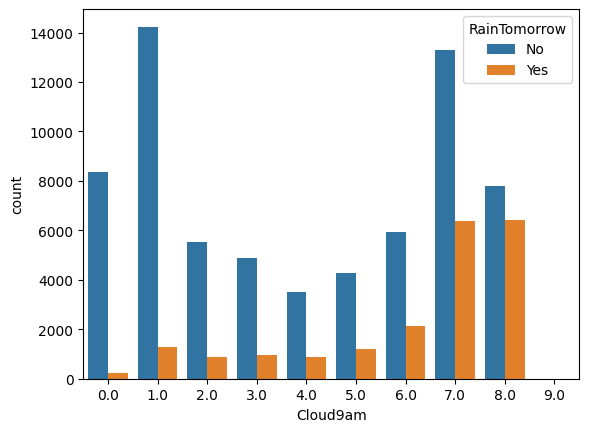

In [11]:
df.Cloud9am.unique()
sns.countplot(data=df,x='Cloud9am',hue='RainTomorrow')

<Axes: xlabel='Cloud3pm', ylabel='count'>

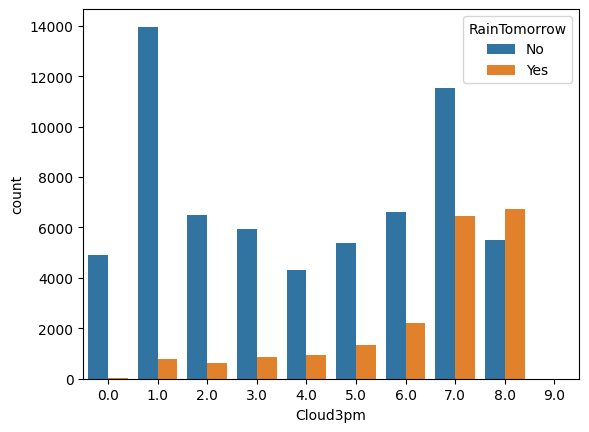

In [12]:
df.Cloud3pm.unique()
sns.countplot(data=df,x='Cloud3pm',hue='RainTomorrow')

as we can see that lower cloud there is rare chance of rain how ever there is a class imbalance for rain tomorrow  but as the cloud increase there is a cahnce of rain as higher cloud cover  is strongly associated with rain the next day so cloud can be strong predictor for rain tomorrow 

<Axes: xlabel='RainTomorrow', ylabel='count'>

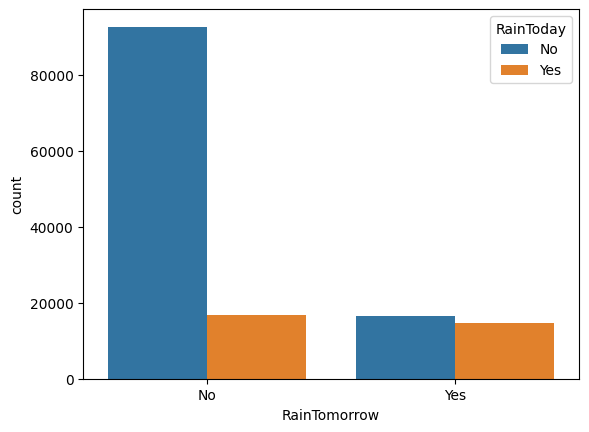

In [13]:
sns.countplot(data=df,x='RainTomorrow', hue='RainToday')

if there is no rain today there is very high chance that it will not rain tomorrow and if there is rain today there is vary low chance that iw will not rain tomorrow , simillaryly if ther is no rain today 

In [14]:

cat_col=df.select_dtypes(include='object').columns.tolist()
cat_col



['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

<Axes: xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

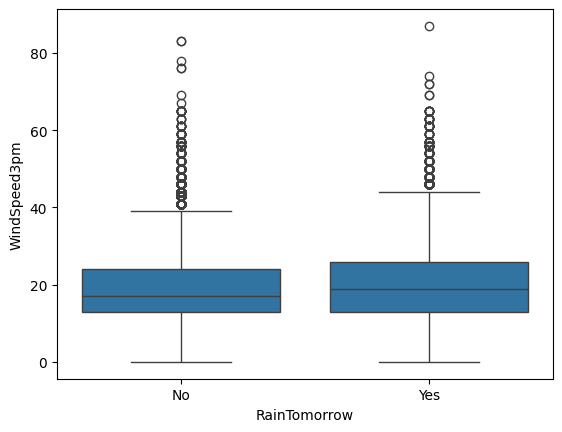

In [15]:
sns.boxplot(
    x='RainTomorrow',
    y='WindSpeed3pm',
    data=df,
)


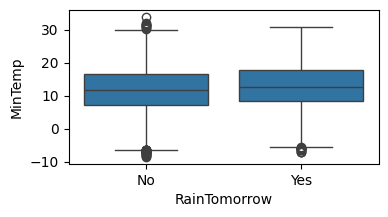

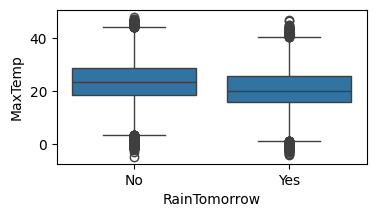

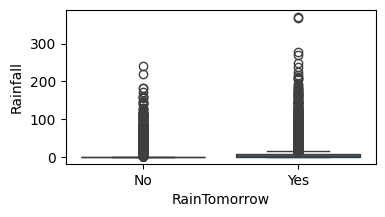

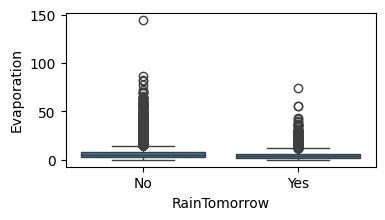

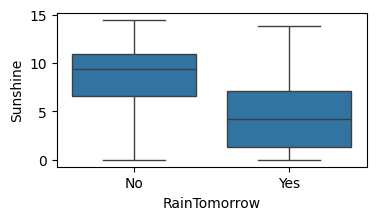

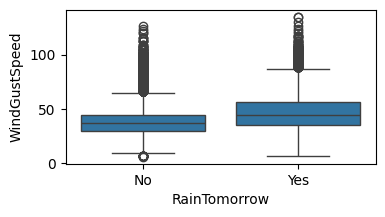

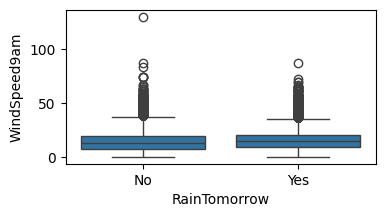

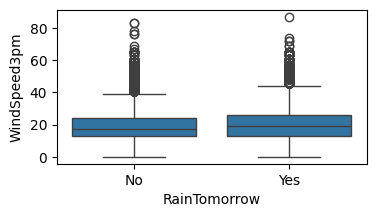

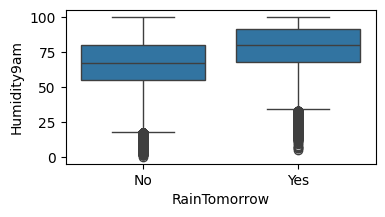

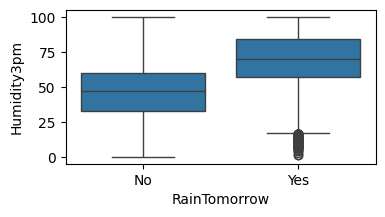

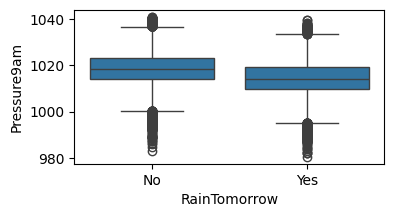

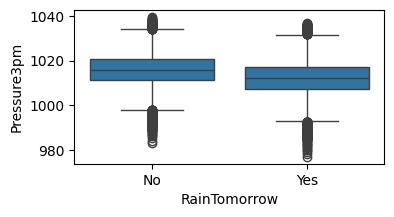

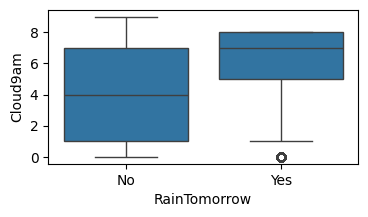

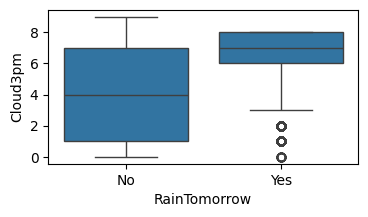

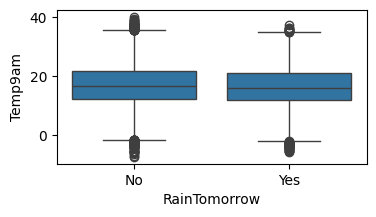

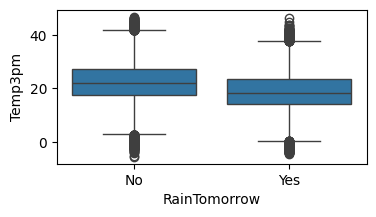

In [16]:
for col in num_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x='RainTomorrow',y=col, data=df)
    plt.show()

<Axes: xlabel='RainTomorrow', ylabel='Cloud3pm'>

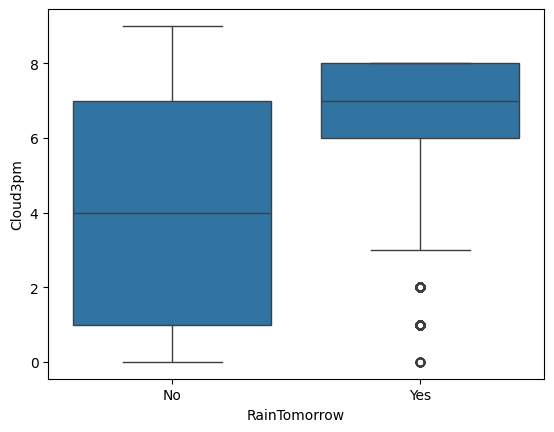

In [17]:
sns.boxplot(data=df,x="RainTomorrow", y='Cloud3pm')

### Observation 1: Cloud values are MUCH higher when RainTomorrow = Yes
	1.Median cloud value for Yes is around 6–7
	2.Median cloud value for No is around 3–4
Days with more cloud cover have a higher chance of rain tomorrow
 ### Observation 2: Distribution shift is very clear (strong relationship)
	1. Entire box for Yes is shifted upward
	2. Very little overlap between boxes
Cloud is a strong predictive feature for rainfall
 .This feature has good class separability
### Observation 3: No-rain days mostly have low to moderate cloud
For RainTomorrow = No:
	1. Middle 50% values are low to mid cloud
	2. High cloud values are less frequent
 Clear or partly cloudy skies usually indicate no rain
### Observation 4: Some outliers exist (important insight)
	You may see:
	2.Low cloud but rain
	3.High cloud but no rain
Cloud alone does not guarantee rain
Rain depends on multiple atmospheric conditions


<Axes: xlabel='Date', ylabel='count'>

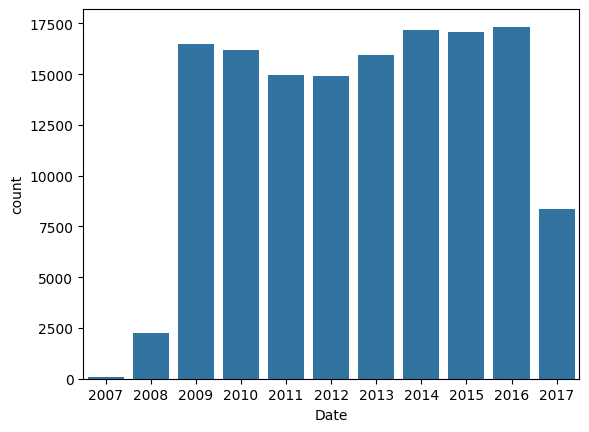

In [18]:
sns.countplot(data=df,x=pd.to_datetime(df['Date']).dt.year)

In [19]:
year=pd.to_datetime(df['Date']).dt.year
year
trian_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]




In [20]:
trian_df.drop("Date",axis=1,inplace=True)
test_df.drop("Date",axis=1,inplace=True)
val_df.drop("Date",axis=1,inplace=True)
trian_df

C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2687595716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_df.drop("Date",axis=1,inplace=True)
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2687595716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop("Date",axis=1,inplace=True)
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2687595716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.drop("Date

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [21]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


for all the numeric column mean and median is almost equal so threr is little outliers or outliers have little influence so we can use mean for filling nan values fro all the column

## FILLING NAN VALUES

In [22]:
from sklearn.impute import SimpleImputer


In [23]:
imputer=SimpleImputer(strategy='mean')

In [24]:
imputer.fit(trian_df[num_columns])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [25]:
list(imputer.statistics_)

[np.float64(12.0078311526097),
 np.float64(23.022202226971093),
 np.float64(2.37293546148508),
 np.float64(5.289991404057933),
 np.float64(7.609003831417625),
 np.float64(40.21587318999561),
 np.float64(14.09226270156723),
 np.float64(18.76460755888938),
 np.float64(68.62874473879673),
 np.float64(51.46954744404988),
 np.float64(1017.5137337413925),
 np.float64(1015.132351891241),
 np.float64(4.302952380952381),
 np.float64(4.410676822773779),
 np.float64(16.8351263678732),
 np.float64(21.540137793658612)]

In [26]:
trian_df[num_columns].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [27]:
trian_df[num_columns]=imputer.transform(trian_df[num_columns])
test_df[num_columns]=imputer.transform(test_df[num_columns])
val_df[num_columns]=imputer.transform(val_df[num_columns])


C:\Users\patha\AppData\Local\Temp\ipykernel_22572\4011721858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_df[num_columns]=imputer.transform(trian_df[num_columns])
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\4011721858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[num_columns]=imputer.transform(test_df[num_columns])
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\4011721858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [28]:
val_df[num_columns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [29]:
test_df["MinTemp"].mean()


np.float64(12.847407224360683)

## SCALING 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar=StandardScaler()

In [32]:
scalar.fit(trian_df[num_columns])

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [33]:
trian_df[num_columns]=scalar.transform(trian_df[num_columns])
test_df[num_columns]=scalar.transform(test_df[num_columns])
val_df[num_columns]=scalar.transform(val_df[num_columns])

C:\Users\patha\AppData\Local\Temp\ipykernel_22572\305932570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_df[num_columns]=scalar.transform(trian_df[num_columns])
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\305932570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[num_columns]=scalar.transform(test_df[num_columns])
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\305932570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [34]:
trian_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,0.219690,-0.017513,-0.208121,0.0,0.0,W,0.286415,W,WNW,...,0.125458,-1.427963,-1.456993,-1.205506,1.608431,0.000000,0.010159,0.038155,No,No
1,Albury,-0.727135,0.297777,-0.278554,0.0,0.0,WNW,0.286415,NNW,WSW,...,-1.303059,-1.282596,-1.026445,-1.100449,0.000000,0.000000,0.057139,0.405220,No,No
2,Albury,0.140788,0.383765,-0.278554,0.0,0.0,WSW,0.437793,W,WSW,...,-1.620507,-1.040319,-1.471839,-0.965376,0.000000,-1.125528,0.652212,0.243711,No,No
3,Albury,-0.443088,0.713387,-0.278554,0.0,0.0,NE,-1.227357,SE,E,...,-1.250151,-1.718696,0.012807,-0.350043,0.000000,0.000000,0.198077,0.728238,No,No
4,Albury,0.866688,1.329637,-0.161166,0.0,0.0,W,0.059349,ENE,NW,...,0.707447,-0.894952,-0.996752,-1.370596,1.173373,1.675829,0.151098,1.198082,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.772005,1.458619,-0.278554,0.0,0.0,SSE,0.210727,ESE,SSE,...,-2.467036,-1.864063,-0.506819,-0.800287,0.000000,0.000000,1.075027,1.506418,No,No
144549,Uluru,0.487957,1.974549,-0.278554,0.0,0.0,NE,-0.697537,ENE,SW,...,-2.784484,-2.106341,-0.729516,-1.130466,0.000000,0.000000,1.889338,1.946896,No,No
144550,Uluru,0.835127,2.117863,-0.278554,0.0,0.0,ESE,-0.092028,ESE,SSE,...,-2.837392,-2.106341,-0.833441,-1.070433,0.000000,0.000000,2.014617,2.079040,No,No
144551,Uluru,1.276979,2.218183,-0.278554,0.0,0.0,ESE,0.210727,ESE,SSW,...,-2.467036,-2.057885,-0.521665,-0.890335,0.000000,0.000000,2.030277,2.299280,No,No


## fill nan for categorical

In [35]:
cat_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [36]:
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [49]:
df["WindGustDir"]=df["WindGustDir"].fillna("missing")


In [50]:
df["WindDir9am"]=df["WindDir9am"].fillna("missing")

In [51]:
trian_df["WindGustDir"]=trian_df["WindGustDir"].fillna("missing")

C:\Users\patha\AppData\Local\Temp\ipykernel_22572\1320159155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_df["WindGustDir"]=trian_df["WindGustDir"].fillna("missing")


In [52]:
test_df["WindGustDir"]=test_df["WindGustDir"].fillna("missing")
val_df["WindGustDir"]=val_df["WindGustDir"].fillna("missing")
trian_df["WindDir9am"]=trian_df["WindDir9am"].fillna("missing")
test_df["WindDir9am"]=test_df["WindDir9am"].fillna("missing")
val_df["WindDir9am"]=val_df["WindDir9am"].fillna("missing")
trian_df['WindDir3pm']=trian_df['WindDir3pm'].fillna(trian_df['WindDir3pm'].mode()[0])
test_df['WindDir3pm']=test_df['WindDir3pm'].fillna(test_df['WindDir3pm'].mode()[0])
val_df['WindDir3pm']=val_df['WindDir3pm'].fillna(val_df['WindDir3pm'].mode()[0])


C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2065342968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["WindGustDir"]=test_df["WindGustDir"].fillna("missing")
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2065342968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["WindGustDir"]=val_df["WindGustDir"].fillna("missing")
C:\Users\patha\AppData\Local\Temp\ipykernel_22572\2065342968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [53]:
trina_input=trian_df.drop(labels='RainTomorrow',axis=1)
train_target=trian_df["RainTomorrow"]
test_input=test_df.drop(labels='RainTomorrow',axis=1)
test_target=test_df["RainTomorrow"]
val_input=val_df.drop(labels='RainTomorrow',axis=1)
val_target=val_df["RainTomorrow"]

In [54]:
input_cat_column=trina_input.select_dtypes(include='object').columns.to_list()
input_cat_column


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder=OneHotEncoder( handle_unknown='ignore',sparse_output=False)

In [71]:
encoder.fit(trina_input[input_cat_column])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_cate

In [72]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'missing'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'missing'], dtype=

In [73]:
encoded_cols=list(encoder.get_feature_names_out(input_cat_column))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [74]:
train_encoded=pd.DataFrame(encoder.transform(trina_input[input_cat_column]),columns=encoded_cols,index=trina_input.index)
test_encoded=pd.DataFrame(encoder.transform(test_input[input_cat_column]),columns=encoded_cols,index=test_input.index)
val_encoded=pd.DataFrame(encoder.transform(val_input[input_cat_column]),columns=encoded_cols,index=val_input.index)

In [76]:
trina_input=np.concat((trina_input,train_encoded),axis=1)
test_input=np.concat((test_input,test_encoded),axis=1)
val_input=np.concat((val_input,val_encoded),axis=1)

In [78]:
trina_input.shape

(97988, 122)